In [33]:
import pandas as pd
import numpy as np

# Import Data

In [3]:
sales_data = pd.read_csv("sales.csv")
customer_data = pd.read_excel("customer_list.xlsx")

In [4]:
print(sales_data.shape)
sales_data.head()

(2999, 4)


,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [5]:
print(customer_data.shape)
customer_data.head()

(200, 3)


,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,42872
4,김 시온,E시,43127


# 상품명 오류 수정

- 현재, 상품명의 양식이 통일되지 않은 것 같습니다. 띄어쓰기도 제각각이고, 대/소문자 구분도 엉망이네요.
- 이를 [상품N] 형식으로 통일해봅시다.

In [10]:
sales_data.item_name.unique()

array(['상품A', '상품B', '상품C', '상품D', '상품E', '상품F', '상품G', '상품H', '상품I',
       '상품J', '상품K', '상품L', '상품M', '상품N', '상품O', '상품P', '상품Q', '상품R',
       '상품S', '상품T', '상품U', '상품V', '상품W', '상품X', '상품Y', '상품Z'],
      dtype=object)

In [8]:
import re

# 대문자로 변환
sales_data.item_name = sales_data.item_name.str.upper()

# 빈칸 삭제
sales_data.item_name = sales_data.item_name.apply(lambda x: re.sub("\s+", "", x))
#sales_data.item_name = sales_data.item_name.str.replace(" ", "")

# 상품명으로 정렬
sales_data = sales_data.sort_values(by="item_name", ascending=True)

# 인덱스 칼럼 삭제
sales_data.reset_index(drop="index", inplace=True)

In [9]:
sales_data

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-02-12 6:06,상품A,100.0,김태경
2,2019-07-19 14:12,상품A,NaN,김서윤
3,2019-06-12 10:08,상품A,100.0,김지용
4,2019-07-26 15:06,상품A,100.0,김연준
...,...,...,...,...
2994,2019-03-28 8:28,상품Y,2500.0,김준형
2995,2019-03-07 8:59,상품Y,2500.0,김재현
2996,2019-05-05 18:09,상품Y,2500.0,김도경
2997,2019-03-14 12:23,상품Y,NaN,김연호


In [11]:
print("상품명의 종류는 {}개 입니다".format(len(sales_data.item_name.unique())))
sales_data.item_name.unique()

상품명의 종류는 26개 입니다


array(['상품A', '상품B', '상품C', '상품D', '상품E', '상품F', '상품G', '상품H', '상품I',
       '상품J', '상품K', '상품L', '상품M', '상품N', '상품O', '상품P', '상품Q', '상품R',
       '상품S', '상품T', '상품U', '상품V', '상품W', '상품X', '상품Y', '상품Z'],
      dtype=object)

# 상품가격 결측치 처리

- 결측치를 처리하는 과정은 추후 분석에 있어 큰 영향을 미칠 수 있습니다.
- 현재 item_price 칼럼에 결측치들이 존재하는 것 같습니다. 집계된 기간 동안 상품가격이 변하지 않았다는 가정하에, 결측치를 채워봅시다.

In [12]:
sales_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-02-12 6:06,상품A,100.0,김태경
2,2019-07-19 14:12,상품A,NaN,김서윤
3,2019-06-12 10:08,상품A,100.0,김지용
4,2019-07-26 15:06,상품A,100.0,김연준


In [13]:
sales_data.isnull().sum()

purchase_date      0
item_name          0
item_price       387
customer_name      0
dtype: int64

In [14]:
sales_data.isnull().any()

purchase_date    False
item_name        False
item_price        True
customer_name    False
dtype: bool

In [11]:
print("결측치: {}/{}".format(sales_data.isnull().sum()["item_price"], len(sales_data)))

결측치: 387/2999


In [15]:
# 결측치들의 인덱스
missing_index = sales_data.item_price[sales_data.item_price.isnull()].index
missing_index

Int64Index([   2,    7,   17,   38,   39,   42,   46,   55,   57,   63,
            ...
            2924, 2925, 2931, 2934, 2936, 2941, 2962, 2981, 2993, 2997],
           dtype='int64', length=387)

In [13]:
sales_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-05-19 20:22,상품A,100.0,김시훈
2,2019-06-25 8:13,상품A,100.0,김유진
3,2019-06-13 16:03,상품A,100.0,김건희
4,2019-02-10 0:28,상품A,100.0,김하랑


In [16]:
# 결측치 채우기
for index in missing_index:
    name = sales_data.loc[index, "item_name"]
    product_info = sales_data[sales_data.item_name == name]
    price = product_info[product_info.item_price >= 1].item_price.unique()
    
    # Fill in the missing price
    sales_data.loc[index, "item_price"] = price

In [17]:
print(len(sales_data.item_name.unique()))
print(len(sales_data.item_price.unique()))
sales_data.item_price.unique()

26
26


array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700., 1800.,
       1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.])

In [18]:
sales_data.isnull().any()

purchase_date    False
item_name        False
item_price       False
customer_name    False
dtype: bool

In [19]:
# 가격이 잘못 기입되지 않았는지 다시 확인

item_names = list(sales_data["item_name"].sort_values().unique())

for item in item_names:
    max_price = sales_data[sales_data.item_name == item_names[0]].item_price.max()
    min_price = sales_data[sales_data.item_name == item_names[0]].item_price.min()

    if max_price != min_price:
        print("There is error in {}".format(item))

- 상품가격의 결측치가 제대로 채워진 것 같습니다!

# 고객명 오류 수정

- sales 데이터와 customer 데이터에 각각에는 고객 이름에 대한 정보가 포함되어 있습니다.
- 하지만 두 데이터셋에서 고객명을 기입하는 양식이 조금 다른 것 같네요. customer 데이터에서는 성과 이름 사이에 띄어쓰기가 되어있는 반면, sales 데이터에서는 붙어있습니다. 
- 나중에 고객명을 키 값으로 두 데이터셋을 결합할 수 있을 것 같은데요, 이를 위해서 이름의 형식을 통일해주도록 할게요.

In [20]:
sales_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-02-12 6:06,상품A,100.0,김태경
2,2019-07-19 14:12,상품A,100.0,김서윤
3,2019-06-12 10:08,상품A,100.0,김지용
4,2019-07-26 15:06,상품A,100.0,김연준


In [54]:
customer_data.head()

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04
1,김 도윤,E시,2017-02-16
2,김 지한,A시,2018-01-07
3,김 하윤,F시,2017-05-17
4,김 시온,E시,2018-01-27


In [55]:
customer_data.고객이름 = customer_data.고객이름.apply(lambda x: re.sub(r"\s+", "", x))

In [56]:
customer_data

,고객이름,지역,등록일
0,김현성,H시,2018-01-04
1,김도윤,E시,2017-02-16
2,김지한,A시,2018-01-07
3,김하윤,F시,2017-05-17
4,김시온,E시,2018-01-27
...,...,...,...
195,김재희,G시,2017-06-20
196,김도영,E시,2018-06-20
197,김이안,F시,2017-04-29
198,김시현,H시,2019-04-19


# 날짜 자료형 통합

- 현재 customer 데이터의 등록일 칼럼을 보시면 날짜의 서식이 이상한 엔트리들이 보입니다. (Ex. 42782)
- 날짜 데이터에서 이렇게 연속된 정수값들은 대부분 특정한 날 (일반적으로 1900/01/01) 을 기준으로 몇일이 경과했는지를 나타내는 timeDelta 서식입니다.
- 또한, sales 데이터의 purchase_date 칼럼은 얼핏보면 시간 자료형처럼 보이나, 실제로는 문자열 데이터입니다. 이는 파이썬에서 데이터프레임을 import 하는 과정에서 날짜 자료형이 문자열 자료형으로 자동 변환되기 때문입니다.
- 두 데이터 모두 날짜 자료형을 판다스의 datetime 형식으로 통합해주도록 합시다.


In [22]:
sales_data.head(2)

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-02-12 6:06,상품A,100.0,김태경


In [23]:
# 날짜 자료형 변환 및 연월 칼럼 추가
sales_data["purchase_date"] = pd.to_datetime(sales_data.purchase_date)
sales_data["purchase_month"] = sales_data.purchase_date.dt.strftime("%Y%m")

sales_data.head(3)

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1,2019-02-12 06:06:00,상품A,100.0,김태경,201902
2,2019-07-19 14:12:00,상품A,100.0,김서윤,201907


In [24]:
customer_data.head(3) #1900년부터 며칠이 지났는지를 기준으로 날짜를 샌 것.

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00


In [29]:
serial_index = customer_data.등록일.astype("str").str.isdigit()
serial_index = customer_data[serial_index].index
serial_index   # 타임델타 자료들의 인덱스

Int64Index([], dtype='int64')

- 위 인덱스에 해당되는 데이터를 날짜 자료형으로 변환하기에 앞서, 타임델타 서식과 관련해서 파이썬과 엑셀의 차이점에 대해 짚고 넘어갑시다.
- 결론부터 말하자면, **엑셀 데이터의 타임델타를 파이썬에서 계산하면 2일이 어긋나게 됩니다**. 그 이유는 다음과 같습니다.

---

1. 파이썬 인덱스는 0부터 시작하는 반면, 엑셀의 인덱스는 1부터 시작한다.
2. 1900은 평년이라 파이썬에서는 1900/02/29 라는 날짜가 존재하지 않지만, 엑셀에서는 이를 유효한 날짜로 계산한다. (엑셀의 버그)

--- 

- 현재 customer 데이터는 엑셀 파일로 저장된 것을 파이썬으로 불러온 것이기 때문에, **날짜를 변환하는 과정에서 2를 추가적으로 뺴줘야합니다**. 이를 고려해서 자료형을 변환해줍시다.

In [57]:
# For Delta format
for index in serial_index:
    date = pd.to_timedelta(customer_data.loc[index, "등록일"] - 2, unit="D") + pd.to_datetime("1900.01.01")
    customer_data.loc[index, "등록일"] = date
    
customer_data

,고객이름,지역,등록일
0,김현성,H시,2018-01-04
1,김도윤,E시,2017-02-16
2,김지한,A시,2018-01-07
3,김하윤,F시,2017-05-17
4,김시온,E시,2018-01-27
...,...,...,...
195,김재희,G시,2017-06-20
196,김도영,E시,2018-06-20
197,김이안,F시,2017-04-29
198,김시현,H시,2019-04-19


In [31]:
customer_data.등록일 #아직 dtype이 object네요.

0     2018-01-04
1     2017-02-16
2     2018-01-07
3     2017-05-17
4     2018-01-27
         ...    
195   2017-06-20
196   2018-06-20
197   2017-04-29
198   2019-04-19
199   2019-04-23
Name: 등록일, Length: 200, dtype: datetime64[ns]

In [58]:
# 전체적으로 날짜 자료형으로 변환
customer_data["등록일"] = pd.to_datetime(customer_data.등록일)

customer_data.head()

,고객이름,지역,등록일
0,김현성,H시,2018-01-04
1,김도윤,E시,2017-02-16
2,김지한,A시,2018-01-07
3,김하윤,F시,2017-05-17
4,김시온,E시,2018-01-27


- 날짜 자료형으로 제대로 변환된 것 같습니다.

# 데이터 결합

- 앞서 전처리를 완료한 customer 데이터와 sales 데이터를 고객명을 키로 합쳐주도록 합시다.


In [59]:
sales_data.head(3)

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1,2019-02-12 06:06:00,상품A,100.0,김태경,201902
2,2019-07-19 14:12:00,상품A,100.0,김서윤,201907


In [53]:
customer_data.head(3)

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04
1,김 도윤,E시,2017-02-16
2,김 지한,A시,2018-01-07


In [60]:
#column명이 다른 경우 
df = pd.merge(sales_data, customer_data, left_on="customer_name", right_on="고객이름", how="left")
#customer name과 고객이름이 중복되어서 하나 삭제. 
df.drop("customer_name", axis=1, inplace=True)
df   # 통합된 데이터프레임

,purchase_date,item_name,item_price,purchase_month,고객이름,지역,등록일
0,2019-06-13 18:02:00,상품A,100.0,201906,김가온,C시,2017-01-26
1,2019-02-12 06:06:00,상품A,100.0,201902,김태경,D시,2018-01-29
2,2019-07-19 14:12:00,상품A,100.0,201907,김서윤,G시,2017-01-30
3,2019-06-12 10:08:00,상품A,100.0,201906,김지용,B시,2018-07-21
4,2019-07-26 15:06:00,상품A,100.0,201907,김연준,A시,2018-07-29
...,...,...,...,...,...,...,...
2994,2019-03-28 08:28:00,상품Y,2500.0,201903,김준형,C시,2018-03-09
2995,2019-03-07 08:59:00,상품Y,2500.0,201903,김재현,D시,2018-07-22
2996,2019-05-05 18:09:00,상품Y,2500.0,201905,김도경,H시,2018-06-13
2997,2019-03-14 12:23:00,상품Y,2500.0,201903,김연호,E시,2017-02-07


# 가공된 데이터 저장

- csv 파일로 저장하기 이전에, 편의상 칼럼들을 재배치 해줍시다.

In [61]:
df.head()

,purchase_date,item_name,item_price,purchase_month,고객이름,지역,등록일
0,2019-06-13 18:02:00,상품A,100.0,201906,김가온,C시,2017-01-26
1,2019-02-12 06:06:00,상품A,100.0,201902,김태경,D시,2018-01-29
2,2019-07-19 14:12:00,상품A,100.0,201907,김서윤,G시,2017-01-30
3,2019-06-12 10:08:00,상품A,100.0,201906,김지용,B시,2018-07-21
4,2019-07-26 15:06:00,상품A,100.0,201907,김연준,A시,2018-07-29


In [62]:
dump_data = df[["purchase_date", "purchase_month", "item_name", "item_price", "고객이름", "지역", "등록일"]]
dump_data.head()

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02:00,201906,상품A,100.0,김가온,C시,2017-01-26
1,2019-02-12 06:06:00,201902,상품A,100.0,김태경,D시,2018-01-29
2,2019-07-19 14:12:00,201907,상품A,100.0,김서윤,G시,2017-01-30
3,2019-06-12 10:08:00,201906,상품A,100.0,김지용,B시,2018-07-21
4,2019-07-26 15:06:00,201907,상품A,100.0,김연준,A시,2018-07-29


In [63]:
# csv file로 데이터 저장
dump_data.to_csv("full_data2.csv", index=False)

# EDA

- 아주 간단하게 가공된 데이터에 대해서 알아봅시다.


In [64]:
# Import the dumped data
data = pd.read_csv("full_data2.csv")
data.head()

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02:00,201906,상품A,100.0,김가온,C시,2017-01-26 00:00:00
1,2019-02-12 06:06:00,201902,상품A,100.0,김태경,D시,2018-01-29 00:00:00
2,2019-07-19 14:12:00,201907,상품A,100.0,김서윤,G시,2017-01-30 00:00:00
3,2019-06-12 10:08:00,201906,상품A,100.0,김지용,B시,2018-07-21 00:00:00
4,2019-07-26 15:06:00,201907,상품A,100.0,김연준,A시,2018-07-29 00:00:00


In [40]:
# 월별 & 상품별 판매량
monthly_volume_byItem = data.pivot_table(index="purchase_month", columns="item_name", 
                                         aggfunc="size", fill_value=0)
monthly_volume_byItem

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
201902,19,14,26,21,16,14,14,17,12,14,...,22,22,22,23,19,22,24,16,11,1
201903,17,21,20,17,9,27,14,18,12,16,...,23,16,20,12,23,18,16,21,16,0
201904,17,19,24,20,18,17,14,11,18,13,...,20,20,16,16,11,15,14,16,20,0
201905,24,14,16,14,19,18,23,15,16,11,...,13,22,18,16,16,9,21,16,20,0
201906,24,12,11,19,13,18,15,13,19,22,...,15,16,21,12,18,20,17,15,13,0
201907,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


In [50]:
# 월별 & 상품별 판매액
monthly_sales_byItem = data.pivot_table(index="purchase_month", columns="item_name", 
                                        values="item_price",  
                                        aggfunc="sum", fill_value=0)
monthly_sales_byItem

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1800,2600,5700,6800,9000,9000,7700,12800,16200,17000,...,28900,37800,38000,34000,14700,48400,29900,33600,25000,0
201902,1900,2800,7800,8400,8000,8400,9800,13600,10800,14000,...,37400,39600,41800,46000,39900,48400,55200,38400,27500,2600
201903,1700,4200,6000,6800,4500,16200,9800,14400,10800,16000,...,39100,28800,38000,24000,48300,39600,36800,50400,40000,0
201904,1700,3800,7200,8000,9000,10200,9800,8800,16200,13000,...,34000,36000,30400,32000,23100,33000,32200,38400,50000,0
201905,2400,2800,4800,5600,9500,10800,16100,12000,14400,11000,...,22100,39600,34200,32000,33600,19800,48300,38400,50000,0
201906,2400,2400,3300,7600,6500,10800,10500,10400,17100,22000,...,25500,28800,39900,24000,37800,44000,39100,36000,32500,0
201907,2000,4000,5100,6800,6000,10200,13300,15200,17100,23000,...,25500,34200,43700,42000,27300,61600,36800,43200,30000,0


In [65]:
# 월별 & 고객별 판매량
monthly_volume_byCustomer = data.pivot_table(index="purchase_month", columns="고객이름", 
                                             aggfunc="count", fill_value=0)['item_name']
monthly_volume_byCustomer

고객이름,김가온,김강민,김강현,김건우,김건희,김경민,김규민,김규현,김다온,김대현,...,김현수,김현승,김현우,김현준,김현진,김호준,정도형,정영훈,정우석,정준기
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1,2,1,2,5,3,1,1,1,5,...,3,2,4,2,1,1,4,4,4,3
201902,3,1,4,3,3,5,2,3,1,5,...,5,3,7,0,0,1,2,0,2,2
201903,4,0,3,1,1,2,2,1,1,5,...,3,2,1,2,1,2,1,2,3,4
201904,1,0,3,0,2,1,2,6,2,4,...,0,4,3,1,1,2,2,4,3,1
201905,0,0,2,2,1,4,6,3,3,1,...,2,2,1,4,3,0,0,0,1,2
201906,5,0,3,0,2,1,6,1,1,1,...,2,4,1,0,4,2,2,0,0,2
201907,3,1,3,2,2,1,4,1,4,3,...,2,1,0,4,0,2,6,1,2,3


In [66]:
# 월별 & 지역별 판매량
monthly_volume_byRegion = data.pivot_table(index="purchase_month", columns="지역", aggfunc="size", fill_value=0)
monthly_volume_byRegion

지역,A시,B시,C시,D시,E시,F시,G시,H시
purchase_month,,,,,,,,
201901,59,55,72,34,49,57,49,42
201902,71,46,65,48,61,52,43,63
201903,64,52,57,43,52,59,51,59
201904,64,48,54,45,48,58,40,52
201905,57,52,68,48,59,65,35,43
201906,53,47,61,30,51,51,58,58
201907,76,53,61,42,54,64,47,54


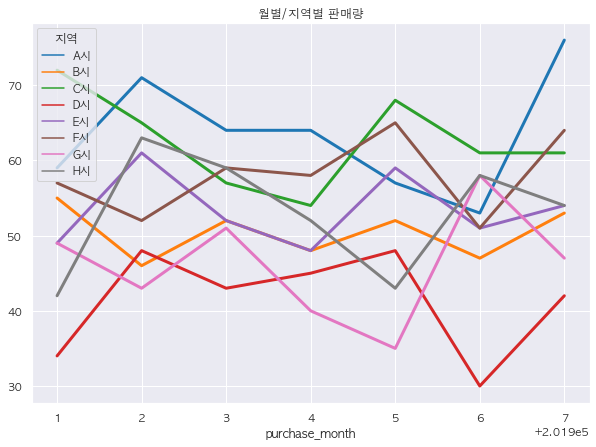

In [67]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,7)})
plt.rcParams['font.family'] = 'AppleGothic'   # 한글 깨짐 방지

sns.lineplot(data = monthly_volume_byRegion, palette = "tab10", 
             dashes=False, linewidth = 3).set_title("월별/지역별 판매량")

plt.show()